In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp

# CEH crop data

The UK Centre for Ecology and Hydrology Land Cover Plus crop maps (https://www.ceh.ac.uk/services/ceh-land-cover-plus-crops-2015) use remote sensing data from two satellites, Copernicus Sentinel-1 C-band SAR and Sentinel-2 optical imaging, to generate a catalog of land parcels classified by crop types.
Data can be accessed through a free academic licence from Digimap (https://digimap.edina.ac.uk/environment)

In this notebook we plot the positions and crop types within the historic county of Yorkshire.
To obtain the Yorkshire county boundaries we use border data from https://osdatahub.os.uk/downloads/open/BoundaryLine, which can be accessed for free.

We will use HEALPY, a spherical pixelisation package to generate a low resolution crop map of Yorkshire.

In [2]:
border_file = '../../data/land/border_lines_GB.gpkg' 
crop_file = '../../data/land/CEH/UK_CEH_Crops_2016.gdb'

In [3]:
fiona.listlayers(border_file)

['boundary_line_ceremonial_counties',
 'boundary_line_historic_counties',
 'community_ward',
 'country_region',
 'county',
 'county_electoral_division',
 'district_borough_unitary',
 'district_borough_unitary_ward',
 'english_region',
 'greater_london_const',
 'high_water',
 'historic_european_region',
 'parish',
 'polling_districts_england',
 'scotland_and_wales_const',
 'scotland_and_wales_region',
 'unitary_electoral_division',
 'westminster_const']

In [4]:
# Yorkshire = 66
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
polygon = counties['geometry'].iloc[66]
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((422004.502 199086.601, 422030...."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((460619.899 235588.003, 460625...."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((499772.602 215220.503, 499795...."
3,Herefordshire,Historic County,"MULTIPOLYGON (((335069.501 272770.499, 335082...."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((424473.304 224921.896, 424502...."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((456472.501 274014.303, 456299...."
91,Dorset,Historic County,"MULTIPOLYGON (((333203.198 91375.703, 333185.9..."
92,Devon,Historic County,"MULTIPOLYGON (((333223.945 91353.145, 333218.0..."
93,Banffshire,Historic County,"MULTIPOLYGON (((349516.703 868874.397, 349519...."


In [5]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [6]:
crops = gpd.read_file(crop_file, mask = polygon)

crops_simple = crops.drop(columns = ['poly_id', 'parent', 'gid'])
crops_simple['geometry'] = crops_simple.centroid
crops_simple['area'] = crops.area
crops_simple.to_file('../../data/land/Yorkshire_CEH_Crops_2016.gpkg', layer='crops', driver="GPKG")


crops['centroid'] = crops.centroid
crops['area'] = crops.area
crops = crops.set_geometry('centroid')
crops

,gid,crop_code,parent,poly_id,crop_name,geometry,centroid,area
0,1587007,ww,0,494060,Winter wheat (includes winter oats),"MULTIPOLYGON (((442984.137 508441.640, 442888....",POINT (442859.522 508448.684),74182.096573
1,673398,ww,0,415700,Winter wheat (includes winter oats),"MULTIPOLYGON (((456168.692 390684.989, 456304....",POINT (456453.823 390562.285),102396.034547
2,1659535,ww,0,2303231,Winter wheat (includes winter oats),"MULTIPOLYGON (((453590.697 436528.070, 453639....",POINT (453655.976 436410.488),83870.444163
3,2601428,ww,0,2238521,Winter wheat (includes winter oats),"MULTIPOLYGON (((423863.797 408051.290, 423821....",POINT (423851.198 408246.850),24454.634953
4,687729,ww,0,2456902,Winter wheat (includes winter oats),"MULTIPOLYGON (((432316.367 502672.490, 432027....",POINT (432151.516 502714.686),34701.408029
...,...,...,...,...,...,...,...,...
123831,1779769,ot,0,5697562,Other crops,"MULTIPOLYGON (((433725.597 491622.316, 433726....",POINT (433685.983 491493.203),27128.218711
123832,1216089,ot,0,2190899,Other crops,"MULTIPOLYGON (((444121.788 402841.804, 444038....",POINT (444047.538 402977.253),37261.270409
123833,1208215,ot,0,2329079,Other crops,"MULTIPOLYGON (((441308.183 474123.352, 441319....",POINT (441434.846 474233.699),75580.295589
123834,1351319,ot,0,2141277,Other crops,"MULTIPOLYGON (((430502.957 399956.810, 430375....",POINT (430544.812 400099.894),43534.566587


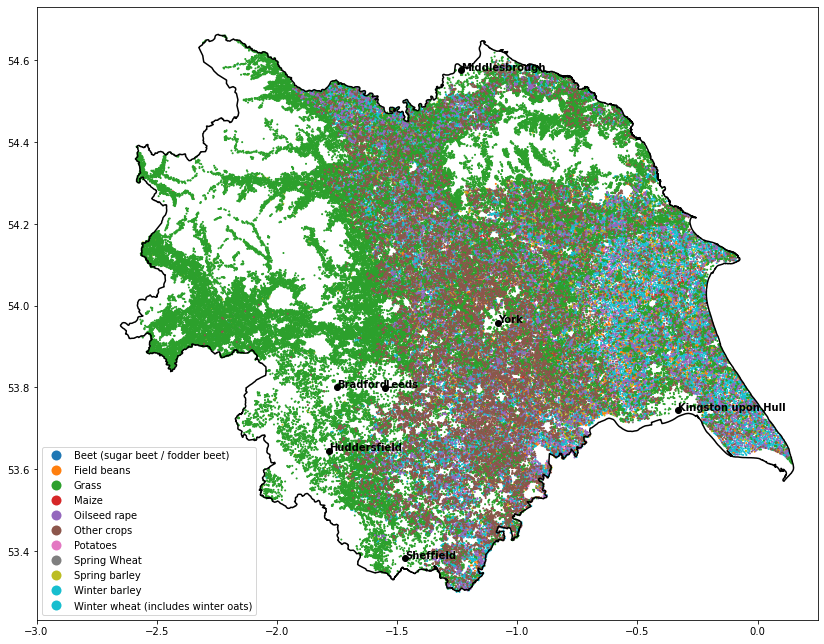

In [7]:
crops = crops.to_crs(epsg=4326)
counties = counties.to_crs(epsg=4326)

base = counties.iloc[66:67].boundary.plot(color = 'k', figsize = (14,14))
crops.plot('crop_name', ax=base, legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

plt.xlim(-3,0.25);
# plt.savefig('../../data/land/Yorkshire_crops_2016.png', dpi = 300)
